# DataVisualization

Here I will complete the exercises from the data visualization tutorial pdf.

## Exercise 1

For Q1:
The slope of the regression line is 0.5000909090909091
The intercept of the regression line is 3.0000909090909103
The correlation coefficient is 0.8164205163448399
The mean of x is 9.0
The variance of x is 10.0
The mean of y is 7.500909090909093
The variance of y is 3.7520628099173554
For Q2:
The slope of the regression line is 0.5000000000000001
The intercept of the regression line is 3.000909090909089
The correlation coefficient is 0.816236506000243
The mean of x is 9.0
The variance of x is 10.0
The mean of y is 7.50090909090909
The variance of y is 3.752390082644628
For Q3:
The slope of the regression line is 0.4997272727272729
The intercept of the regression line is 3.002454545454544
The correlation coefficient is 0.8162867394895984
The mean of x is 9.0
The variance of x is 10.0
The mean of y is 7.5
The variance of y is 3.747836363636364
For Q4:
The slope of the regression line is 0.4999090909090909
The intercept of the regression line is 3.0017272727272726
The correlation 

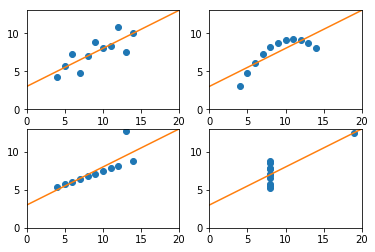

In [213]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as sts
from scipy import special as spec
from numba import jit, njit

data = np.load('data/anscombe.npy')
Q1 = data[: , 0:2]
Q2 = data[: , 2:4]
Q3 = data[: , 4:6]
Q4 = data[: , 6:8]

def reg(Q, gridup, gridlow, gridfine):
    '''
    Returns a slope and intercept for a linear regression on Q... also
    plots the line over a grid of points
    Outputs: 
    beta0 = intercept
    beta1 = slope
    plot = 2 dimensional matrix of points in x and the estimated yhat
    '''
    #regress and pull statistics
    reg = sts.linregress(Q)
    beta0 = reg.intercept
    beta1 = reg.slope
    R = reg.rvalue
    #plot points
    xgrid = np.linspace(gridup, gridlow, gridfine)
    yhat = beta0 + beta1 * xgrid
    plot = [xgrid, yhat]
    return beta0, beta1, plot, R 

def plotex1(Q, ijk):
    '''
    A function for plotting. ijk = 221 for example (subplot index)
    '''
    plt.subplot(ijk)
    plt.plot(Q[:,0], Q[:, 1], 'o')
    r = reg(Q, 0, 20, 100)
    xyhat = r[2]
    #print(xyhat)
    plt.plot(xyhat[0], xyhat[1])
    plt.xlim(0, 20)
    plt.ylim(0, 13)

#plot
plotex1(Q1, 221)
plotex1(Q2, 222)
plotex1(Q3, 223)
plotex1(Q4, 224)

#report mean x, y
def report(Q):
    name = str(Q)
    r = reg(Q, 0, 20, 100)
    intercept = r[0]
    slope = r[1]
    R = r[3]
    meanx = np.mean(Q[:,0])
    varx = np.var(Q[:,0])
    meany = np.mean(Q[:,1])
    vary = np.var(Q[:,1])
    print("The slope of the regression line is", slope)
    print("The intercept of the regression line is", intercept)
    print("The correlation coefficient is", R)
    print("The mean of x is", meanx)
    print("The variance of x is", varx)
    print("The mean of y is", meany)
    print("The variance of y is", vary)

print("For Q1:")    
report(Q1)

print("For Q2:")    
report(Q2)

print("For Q3:")    
report(Q3)

print("For Q4:")    
report(Q4)


This exercise is a pointed reminder that data sets can have the same summary statistics, but be very different in character.

## Exercise 2

C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in reciprocal
  
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


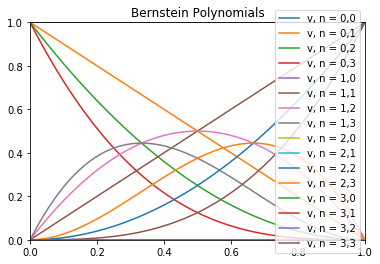

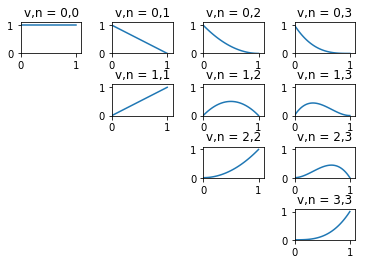

In [235]:
#Define Functions
def bernstein(v, n, x):
    '''
    This function takes in three inputs and computes the bernstein basis
    polynomial b_(v,n) of x
    '''
    nchoosev = spec.binom(n, v)
    output = nchoosev * x ** v * (1 - x) ** (n - v)
    return output

x = np.linspace(0, 1, 100)

# Make large overlapping plot
plt.plot()
for i in range(0, 4):
    for j in range (0, 4):
        plt.plot(x, bernstein(i, j, x), label="v, n = " + str(i) + ',' + str(j))
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='right')
plt.title("Bernstein Polynomials")
plt.show()

#make my smaller plots.

z = 1
for i in range(1, 5):
    for j in range(1, 5):
        if (i > j) == False:
            plt.subplot(4, 4, z)
            plt.plot(x, bernstein(i-1, j-1, x))
            plt.title('v,n = ' + str(i-1) + ',' + str(j-1))
            plt.xlim(0, 1.1)
            plt.ylim(0, 1.1)
        z += 1
plt.subplots_adjust(wspace = .5, hspace = 1)
plt.show()

## Exercise 3

[[ 74.   180.    22.99]
 [ 74.   215.    34.69]
 [ 72.   210.    30.78]
 ...
 [ 75.   205.    25.19]
 [ 75.   190.    31.01]
 [ 73.   195.    27.92]]


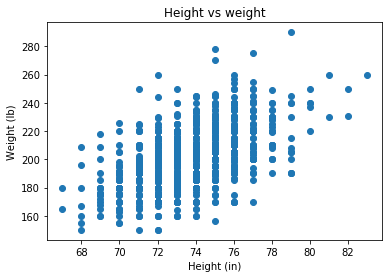

We see that height and weight are correlated


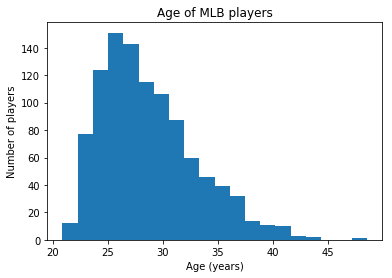

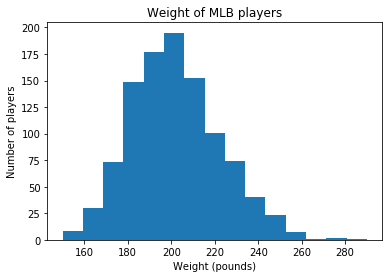

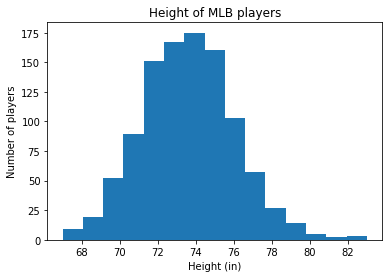

This shows the distrubution of ages, heights, and weights.


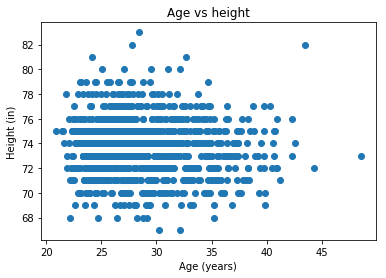

There doesn't appear to be a correlation between age and height.


In [153]:
data = np.load('Data/MLB.npy')
print(data)
ht = data[:, 0]
wt = data[:, 1]
age = data[:, 2]

# Scatter height vs weight
plt.plot(ht, wt, 'o')
plt.title("Height vs weight")
plt.xlabel("Height (in)")
plt.ylabel("Weight (lb)")
plt.show()
print("We see that height and weight are correlated")

#Histogram of age
plt.hist(age, bins=20)
plt.xlabel("Age (years)")
plt.ylabel("Number of players")
plt.title("Age of MLB players")
plt.show()

#Histogram of weight
plt.plot()
plt.hist(wt, bins=15)
plt.xlabel("Weight (pounds)")
plt.ylabel("Number of players")
plt.title("Weight of MLB players")
plt.show()

#Histogram of height
plt.plot()
plt.hist(ht, bins=15)
plt.xlabel("Height (in)")
plt.ylabel("Number of players")
plt.title("Height of MLB players")
plt.show()

print("This shows the distrubution of ages, heights, and weights.")

plt.plot(age, ht, 'o')
plt.title("Age vs height")
plt.xlabel("Age (years)")
plt.ylabel("Height (in)")
plt.show()
print("There doesn't appear to be a correlation between age and height.")

## Exercise 4

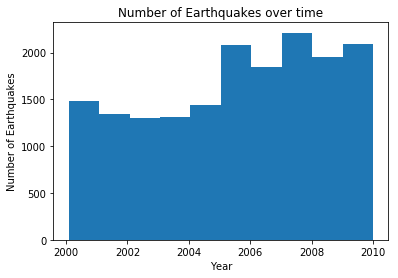

We see that there were more earthquakes after 2005 than before


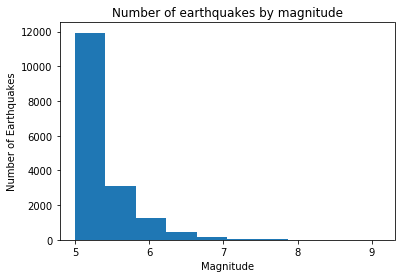

We see that there were very many earthquakes of large magnitude and few earthquakes of small magnitude


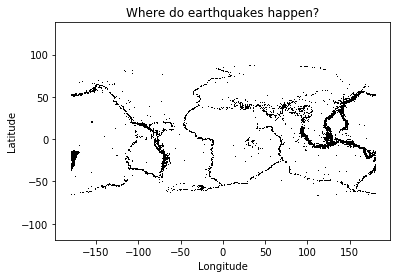

We see that earthquakes tend to happen along Earth's major fault lines.


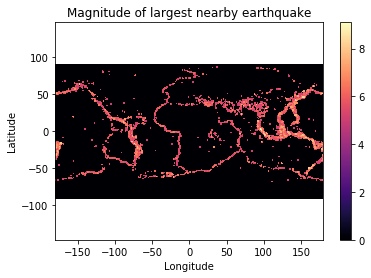

This gives us a better idea of where large earthquakes appear


In [221]:
data = np.load('Data/earthquakes.npy')
year, mag, long, lat = data.T

plt.plot()
plt.hist(year, bins = 10)
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Number of Earthquakes over time")
plt.show()

print("We see that there were more earthquakes after 2005 than \
before")

plt.plot()
plt.title("Number of earthquakes by magnitude")
plt.hist(mag, bins = 10)
plt.xlabel("Magnitude")
plt.ylabel("Number of Earthquakes")
plt.show()

print("We see that there were very many earthquakes of large \
magnitude and few earthquakes of small magnitude")

plt.plot(long, lat, 'k,')
plt.axis("equal")
plt.title("Where do earthquakes happen?")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

print("We see that earthquakes tend to happen along Earth's major \
fault lines.")

#I'll try to make an earthquake heatmap of the world!

#define a grid of lat and long values
boxsize = 1 #distance parameter for bigquake
f = 500 #finenessparameter (make sure these two numbers cover earth)
latgrid = np.linspace(-90, 90, f)
longgrid = np.linspace(-180, 180, f)
Lat, Long = np.meshgrid(latgrid, longgrid)

def bigquake(x, y, k):
    '''
    Takes as inputs x=latitude and y=longitude and yields as outputs 
    the largest earthquake that happened within a box of size k of 
    the (x, y).
    '''
    #Create dataset to work with
    latlongmag = np.zeros((len(long), 3))
    latlongmag[:,0] = lat
    latlongmag[:,1] = long
    latlongmag[:,2] = mag
   
    ''' 
    I'll use fancy indexing to create a mask which gets rid of all the
    data points which are not within one of my selected coordinate 
    point (x, y)
    '''
    latcondition = (abs(x - latlongmag[:,0]) < k)
    longcondition = (abs(y - latlongmag[:,1]) < k)
    mask = (latcondition * longcondition)
    nearbyquakes = latlongmag[mask]

    '''
    Finally, I'll pull the largest magnitude from all the nearby 
    quakes.
    '''

    if len(nearbyquakes) != 0:
        largestnearby = max(nearbyquakes[:,2])
    else:
        largestnearby = 0
        
    return largestnearby

#initialize output matrix
M = np.zeros((f, f))

#@njit 
#(couldn't get jit to work, also couldn't vectorize code... it's slow.)
for i in range(f):
    for j in range(f):
        M[i,j] = bigquake(Lat[i,j], Long[i,j], boxsize)
        
    
plt.pcolormesh(Long, Lat, M, cmap = 'magma')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Magnitude of largest nearby earthquake")
plt.axis('equal')
plt.colorbar()
plt.show()

print("This gives us a better idea of where large earthquakes appear")

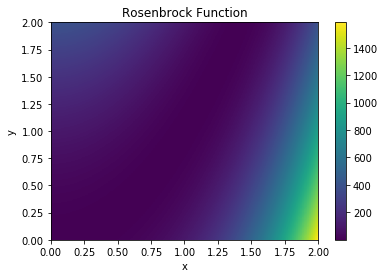

Text(0.5,1,'Rosenbrock Function')

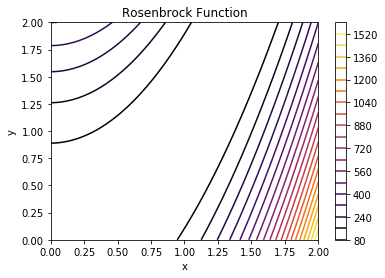

In [232]:
#Define Functions
def rosenbrock(x, y):
    '''
    This function takes x and y and outputs the rosenbrock function
    evaluated at (x,y)
    '''
    r = (1 - x) ** 2 + 100 *(y - x ** 2) ** 2
    
    return r

#Initialize grids
xgrid = np.linspace (0, 2, 400)
ygrid = xgrid
X, Y = np.meshgrid(xgrid, ygrid)


plt.pcolormesh(X, Y, rosenbrock(X,Y), cmap = 'viridis')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Rosenbrock Function")
plt.show()

plt.contour(X, Y, rosenbrock(X,Y), 20, cmap = 'inferno')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Rosenbrock Function")

